In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
df = pd.read_csv("Student_Performance.csv")

print(df.head())
print(df.info())


   Hours Studied  ...  Performance Index
0              7  ...               91.0
1              4  ...               65.0
2              8  ...               45.0
3              5  ...               36.0
4              7  ...               66.0

[5 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


In [30]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})


X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
        'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
cols = df.columns
for col in cols:
    print(df[col].isnull().sum())

0
0
0
0
0
0


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
y_pred = model.predict(X_test)
y_pred


array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301], shape=(2000,))

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 4.082628398521853
R² Score: 0.9889832909573145


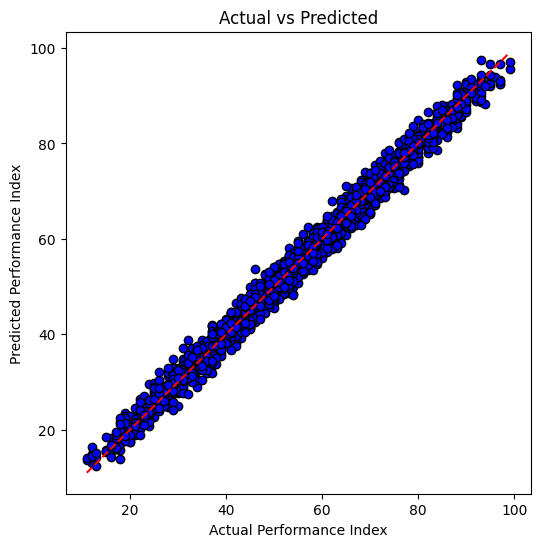

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted")
plt.show()


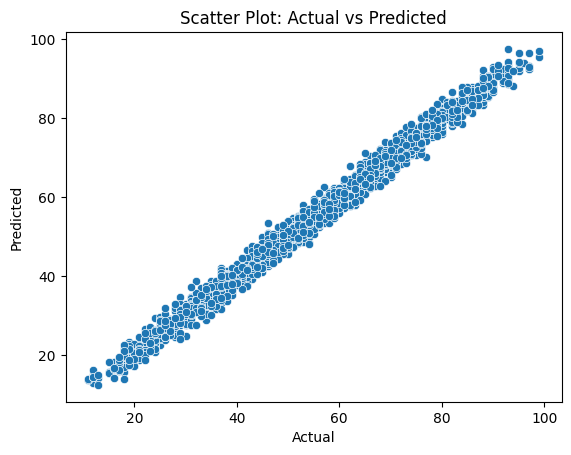

In [43]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter Plot: Actual vs Predicted")
plt.show()


In [44]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coeff_df)


                            Feature  Coefficient
0                     Hours Studied     2.852484
1                   Previous Scores     1.016988
2        Extracurricular Activities     0.608617
3                       Sleep Hours     0.476941
4  Sample Question Papers Practiced     0.191831


If Hours Studied has a coefficient of +2.5, it means that for each additional hour studied, the Performance Index increases by ~2.5 (holding other variables constant).

If Sleep Hours has a negative coefficient, it could mean excessive sleep hours reduce performance (or there’s multicollinearity).

Larger absolute values → stronger impact.